Import stock listing info from the NASDAQ

In this exercise, you will read the file nasdaq-listings.csv with data on companies listed on the NASDAQ and then diagnose issues with the imported data. 
You will fix these issues in the next exercise.

In [1]:
import pandas as pd
from pandas_datareader.data import DataReader

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

from datetime import date
import yfinance as yf

In [2]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv')
nasdaq

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Last Update
0,AAPL,Apple Inc.,141.05,7.400000e+11,1980,Technology,Computer Manufacturing,4/26/17
1,GOOGL,Alphabet Inc.,840.18,5.810000e+11,NAN,Technology,"Computer Software: Programming, Data Processing",4/24/17
2,GOOG,Alphabet Inc.,823.56,5.690000e+11,2004,Technology,"Computer Software: Programming, Data Processing",4/23/17
3,MSFT,Microsoft Corporation,64.95,5.020000e+11,1986,Technology,Computer Software: Prepackaged Software,4/26/17
4,AMZN,"Amazon.com, Inc.",884.67,4.220000e+11,1997,Consumer Services,Catalog/Specialty Distribution,4/24/17
...,...,...,...,...,...,...,...,...
1110,IFV,First Trust Dorsey Wright International Focus ...,18.78,5.380470e+08,NAN,NAN,NAN,4/23/17
1111,QCRH,"QCR Holdings, Inc.",40.85,5.374372e+08,NAN,Finance,Major Banks,4/25/17
1112,AUPH,Aurinia Pharmaceuticals Inc,6.83,5.364592e+08,NAN,Health Care,Major Pharmaceuticals,4/26/17
1113,ESND,Essendant Inc.,14.30,5.358635e+08,NAN,Consumer Services,Paper,4/23/17


In [3]:
# Inspect nasdaq
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           1115 non-null   object 
 1   Company Name           1115 non-null   object 
 2   Last Sale              1115 non-null   float64
 3   Market Capitalization  1115 non-null   float64
 4   IPO Year               1115 non-null   object 
 5   Sector                 1115 non-null   object 
 6   Industry               1115 non-null   object 
 7   Last Update            1115 non-null   object 
dtypes: float64(2), object(6)
memory usage: 69.8+ KB


When inspecting the output of nasdaq.head(10), did you observe that some of the fields contained the string 'NAN'? However, the output of nasdaq.info() didn't report any missing values. To ensure missing values are imported correctly, you need to explicitly set the na_values argument to the required string.

The 'Last Update' column shows date information upon inspection, but is imported as something other than dtype datetime64. To ensure dates are imported correctly, make use of the parse_dates argument.

In [4]:
# Read data using .read_csv() with adequate parsing arguments

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])
nasdaq

C:\Users\Alienware\AppData\Local\Temp\ipykernel_20236\3623788316.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Last Update
0,AAPL,Apple Inc.,141.05,7.400000e+11,1980.0,Technology,Computer Manufacturing,2017-04-26
1,GOOGL,Alphabet Inc.,840.18,5.810000e+11,NaN,Technology,"Computer Software: Programming, Data Processing",2017-04-24
2,GOOG,Alphabet Inc.,823.56,5.690000e+11,2004.0,Technology,"Computer Software: Programming, Data Processing",2017-04-23
3,MSFT,Microsoft Corporation,64.95,5.020000e+11,1986.0,Technology,Computer Software: Prepackaged Software,2017-04-26
4,AMZN,"Amazon.com, Inc.",884.67,4.220000e+11,1997.0,Consumer Services,Catalog/Specialty Distribution,2017-04-24
...,...,...,...,...,...,...,...,...
1110,IFV,First Trust Dorsey Wright International Focus ...,18.78,5.380470e+08,NaN,NaN,NaN,2017-04-23
1111,QCRH,"QCR Holdings, Inc.",40.85,5.374372e+08,NaN,Finance,Major Banks,2017-04-25
1112,AUPH,Aurinia Pharmaceuticals Inc,6.83,5.364592e+08,NaN,Health Care,Major Pharmaceuticals,2017-04-26
1113,ESND,Essendant Inc.,14.30,5.358635e+08,NaN,Consumer Services,Paper,2017-04-23


In [5]:
# Inspect the data
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           1115 non-null   object        
 1   Company Name           1115 non-null   object        
 2   Last Sale              1115 non-null   float64       
 3   Market Capitalization  1115 non-null   float64       
 4   IPO Year               593 non-null    float64       
 5   Sector                 1036 non-null   object        
 6   Industry               1036 non-null   object        
 7   Last Update            1115 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 69.8+ KB


In [6]:
# Load listing info from a single sheet
# Import the data
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.000000e+00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.000000e+00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,3.325561e+08,2014.0,Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals


In [7]:
# Inspect the data
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


Load listing data from two sheets

The import process is just as intuitive when using the sheet_names attribute of a pd.ExcelFile() object.

Passing in a list as the sheet_name argument of pd.read_excel(), whether you assign the list to a variable holding the sheet_names attribute of a pd.ExcelFile() object or type the list out yourself, constructs a dictionary. In this dictionary, the keys are the names of the sheets, and the values are the DataFrames containing the data from the corresponding sheet. You can extract values from a dictionary by providing a particular key in brackets.

In this exercise, you will retrieve the list of stock exchanges from listings.xlsx and then use this list to read the data for all three exchanges into a dictionary. 

In [8]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names
exchanges

['amex', 'nasdaq', 'nyse']

In [9]:
# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')
listings.keys()


C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


dict_keys(['amex', 'nasdaq', 'nyse'])

In [10]:
listings['nasdaq']

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,AAPL,Apple Inc.,141.05,7.400245e+11,1980.0,Technology,Computer Manufacturing
1,GOOGL,Alphabet Inc.,840.18,5.809175e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
2,GOOG,Alphabet Inc.,823.56,5.694261e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
3,MSFT,Microsoft Corporation,64.95,5.019031e+11,1986.0,Technology,Computer Software: Prepackaged Software
4,AMZN,"Amazon.com, Inc.",884.67,4.221385e+11,1997.0,Consumer Services,Catalog/Specialty Distribution
...,...,...,...,...,...,...,...
3162,WSFSL,WSFS Financial Corporation,25.70,0.000000e+00,NaN,Finance,Major Banks
3163,XGTIW,"XG Technology, Inc",6.56,0.000000e+00,2013.0,Consumer Durables,Telecommunications Equipment
3164,ZNWAA,Zion Oil & Gas Inc,NaN,0.000000e+00,NaN,Energy,Oil & Gas Production
3165,ZIONW,Zions Bancorporation,9.87,0.000000e+00,NaN,Finance,Major Banks


In [11]:
# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


In [12]:
# Load all listing data and iterate over key-value dictionary pairs

# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   M

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 
combined_listings

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software,NYSE
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments,NYSE
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,NYSE
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing",NYSE
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines,NYSE
...,...,...,...,...,...,...,...,...
3162,WSFSL,WSFS Financial Corporation,25.70,0.000000e+00,NaN,Finance,Major Banks,NASDAQ
3163,XGTIW,"XG Technology, Inc",6.56,0.000000e+00,2013.0,Consumer Durables,Telecommunications Equipment,NASDAQ
3164,ZNWAA,Zion Oil & Gas Inc,NaN,0.000000e+00,NaN,Energy,Oil & Gas Production,NASDAQ
3165,ZIONW,Zions Bancorporation,9.87,0.000000e+00,NaN,Finance,Major Banks,NASDAQ


In [14]:
# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

print(len(listings))
print(type(listings))
listings[0]

C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


3
<class 'list'>


C:\Users\Alienware\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...,...
355,WYY,WidePoint Corporation,0.4350,3.602423e+07,NaN,Technology,EDP Services,amex
356,WTT,"Wireless Telecom Group, Inc.",1.5200,3.380309e+07,NaN,Capital Goods,Electrical Products,amex
357,XTNT,"Xtant Medical Holdings, Inc.",0.5300,9.589080e+06,NaN,Health Care,Biotechnology: Biological Products (No Diagnos...,amex
358,YUMA,"Yuma Energy, Inc.",2.6150,3.190562e+07,NaN,Energy,Oil & Gas Production,amex


In [15]:
# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

listing_data

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.3000,0.000000e+00,NaN,NaN,NaN,nyse
3143,ZBK,Zions Bancorporation,28.8600,0.000000e+00,NaN,Finance,Major Banks,nyse
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.0700,3.325561e+08,2014.0,Consumer Services,Restaurants,nyse
3145,ZTS,Zoetis Inc.,53.1000,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals,nyse


In [16]:
# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


Get stock data for a single company

In [17]:
# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

In [18]:
# Set the ticker
ticker_AAPL = 'AAPL'

stock_prices_AAPL = yf.download(ticker_AAPL, start=start, end=end)

stock_prices_AAPL

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029D2381A380>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [19]:
# Set the ticker
ticker_META = 'META'

stock_prices_META = yf.download(ticker_META, start=start, end=end)

stock_prices_META

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['META']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029D2381AB90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
Date,,,,,,


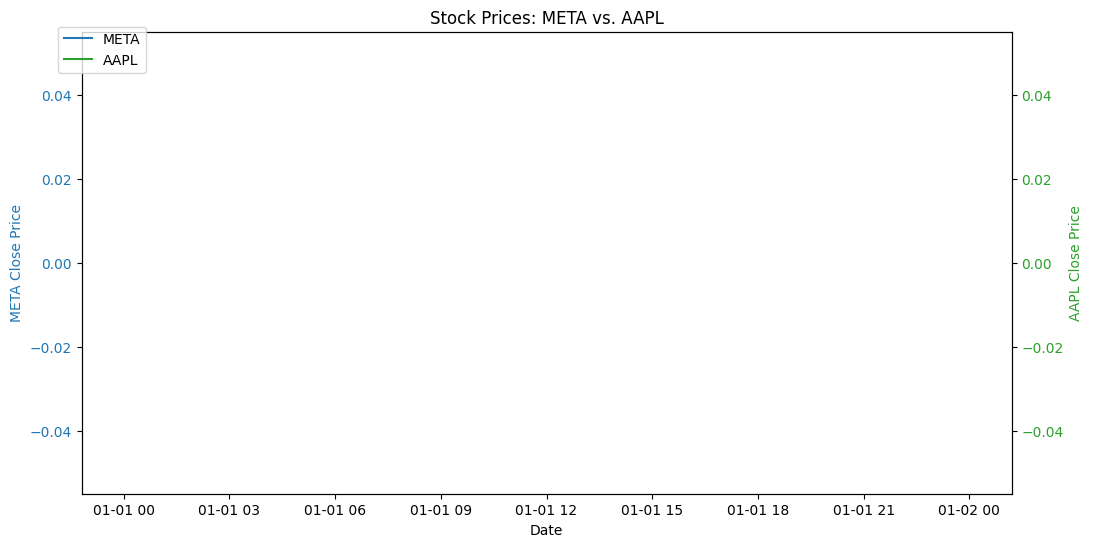

In [20]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot META on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('META Close Price', color=color)
ax1.plot(stock_prices_META['Close'], color=color, label='META')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('AAPL Close Price', color=color)
ax2.plot(stock_prices_AAPL['Close'], color=color, label='AAPL')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Stock Prices: META vs. AAPL')

# Add a legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


Visualize the long-term oil price trend

Retrieve data from the Federal Reserve Economic Data (FRED) portal.

Here, you will use this new data source to visualize the oil price trend over the last 50 years, specifically, the Spot Crude Oil Price: West Texas Intermediate (WTI).

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 684 entries, 1968-01-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTISPLC  684 non-null    float64
dtypes: float64(1)
memory usage: 10.7 KB


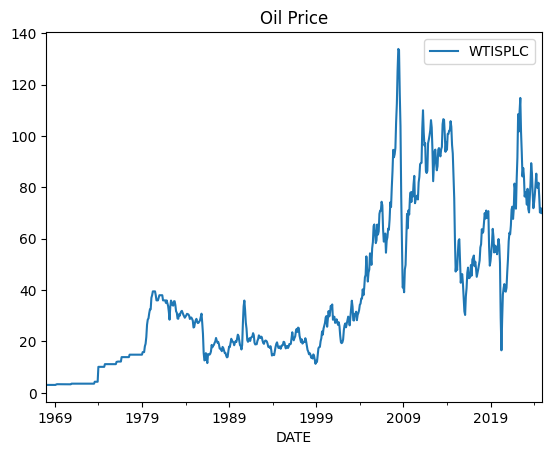

In [21]:
# Set start date
start = date(1968, 1, 1)

# Set series code
series = 'WTISPLC'

# Import the data
oil_price = DataReader(series, 'fred', start=start)

# Inspect the price of oil
oil_price.info()

# Plot the price of oil
oil_price.plot(title='Oil Price')

# Show the plot
plt.show()

Compare labor market participation and unemployment rates

Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

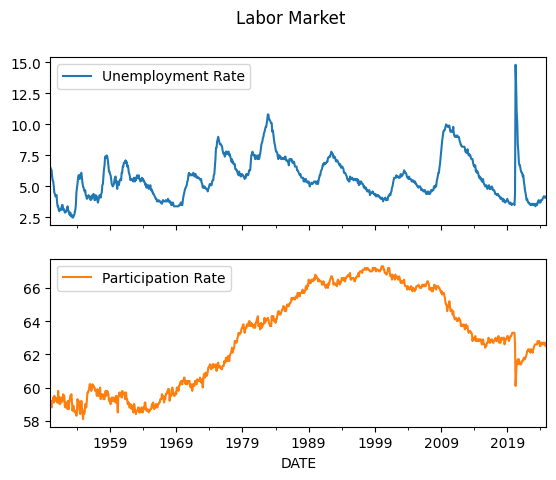

In [22]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

Compare bond and stock performance

Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Yahoo! Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

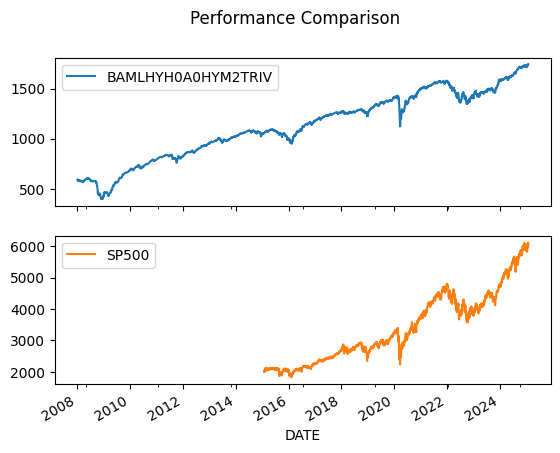

In [23]:
# Set the start date
start = date(2008, 1, 1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

Select the top 5 listed consumer 

As you have just learned, it is possible to filter stocks based on criteria with the sort_values() method and an argument that specifies the column to filter by. Additionally, you can include the argument ascending=False to sort entries from highest to lowest.

Here, you will use this function to find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company. The listing_data DataFrame to be used (as a refresher, it contains data from the AMEX, NYSE, and NASDAQ.)

In [24]:
listing_data.sort_values('Market Capitalization', ascending=False)

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,AAPL,Apple Inc.,141.05,7.400245e+11,1980.0,Technology,Computer Manufacturing,nasdaq
1,GOOGL,Alphabet Inc.,840.18,5.809175e+11,NaN,Technology,"Computer Software: Programming, Data Processing",nasdaq
2,GOOG,Alphabet Inc.,823.56,5.694261e+11,2004.0,Technology,"Computer Software: Programming, Data Processing",nasdaq
3,MSFT,Microsoft Corporation,64.95,5.019031e+11,1986.0,Technology,Computer Software: Prepackaged Software,nasdaq
4,AMZN,"Amazon.com, Inc.",884.67,4.221385e+11,1997.0,Consumer Services,Catalog/Specialty Distribution,nasdaq
...,...,...,...,...,...,...,...,...
2968,EACQW,Easterly Acquisition Corp.,0.45,0.000000e+00,2015.0,Capital Goods,Building Products,nasdaq
2969,EVGBC,Eaton Vance NextShares Trust,99.97,0.000000e+00,NaN,NaN,NaN,nasdaq
2970,EVSTC,Eaton Vance NextShares Trust,99.97,0.000000e+00,NaN,NaN,NaN,nasdaq
2971,EVLMC,Eaton Vance NextShares Trust II,99.94,0.000000e+00,NaN,NaN,NaN,nasdaq


In [25]:
# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head()

,Company Name,Exchange,Market Capitalization
4,"Amazon.com, Inc.",nasdaq,4.221385e+11
3013,"Wal-Mart Stores, Inc.",nyse,2.218646e+11
3014,Walt Disney Company (The),nyse,1.789973e+11
6,Comcast Corporation,nasdaq,1.764745e+11
1438,"Home Depot, Inc. (The)",nyse,1.752626e+11


Get the ticker of the largest consumer services company

Instead of indexing your data with a conditional expression, you can also filter by certain values with .loc[row_selector, column_selector]. Additionally, you can use .set_index() to set a particular column with unique values as the index of a DataFrame, and .idxmax() to return the index of the maximum value.

In this exercise, you will apply these methods of selecting companies to find the most valuable consumer services company on any of the three exchanges, and use its ticker to plot its stock price trend.

In [26]:
listing_data['Stock Symbol'].value_counts()

Stock Symbol
FCFS    2
RRD     2
AMOV    2
PGTI    2
MSG     2
       ..
ADRE    1
HRZN    1
CLDC    1
HDNG    1
ZTO     1
Name: count, Length: 6669, dtype: int64

In [27]:
# Set the index of listings to Stock Symbol
listings_ss = listing_data.set_index('Stock Symbol')
listings_ss


,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
Stock Symbol,,,,,,,
XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...
ZB^H,Zions Bancorporation,25.3000,0.000000e+00,NaN,NaN,NaN,nyse
ZBK,Zions Bancorporation,28.8600,0.000000e+00,NaN,Finance,Major Banks,nyse
ZOES,"Zoe&#39;s Kitchen, Inc.",17.0700,3.325561e+08,2014.0,Consumer Services,Restaurants,nyse


In [28]:
# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss.Sector == 'Consumer Services', 'Market Capitalization'].idxmax()
ticker


'AMZN'

In [29]:
# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = yf.download(ticker, start=start)

data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMZN']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029D262C5270>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,


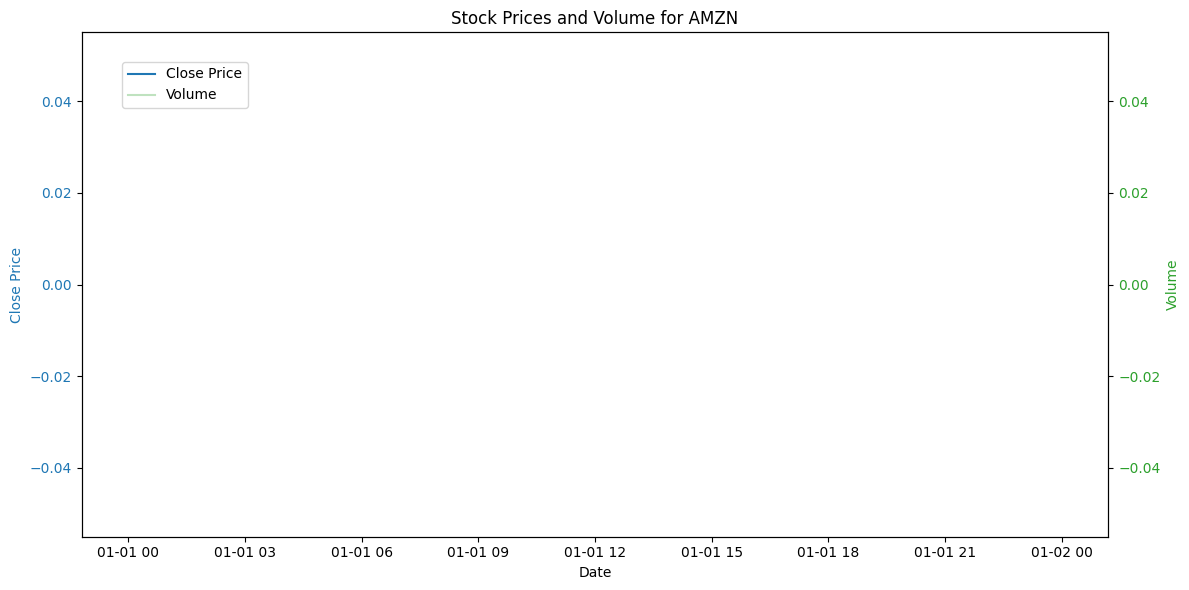

In [30]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the 'Close' price on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(data.index, data['Close'], color=color, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Volume', color=color)
ax2.plot(data.index, data['Volume'], color=color, label='Volume', alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title(f'Stock Prices and Volume for {ticker}')
fig.tight_layout()  # Ensure everything fits without overlap
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


Get the largest consumer company listed after 1998

You can filter your data by even more conditions by enclosing each condition in parentheses and using logical operators like & and |.

Here, you will find out which company is the largest consumer services company that went public after Amazon did in 1997. The data is contained in the column 'IPO Year'; an Initial Public Offering (IPO) is a financial term that describes the first time that the stock of a private company is offered to the public.

In [31]:
# Get ticker of the largest consumer services company listed after 1997
ticker = listings_ss.loc[(listings_ss.Sector == 'Consumer Services') & (listings_ss['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

ticker

'NFLX'

In [32]:
# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = yf.download(ticker, start=start)

data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NFLX']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029D262C60E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,,


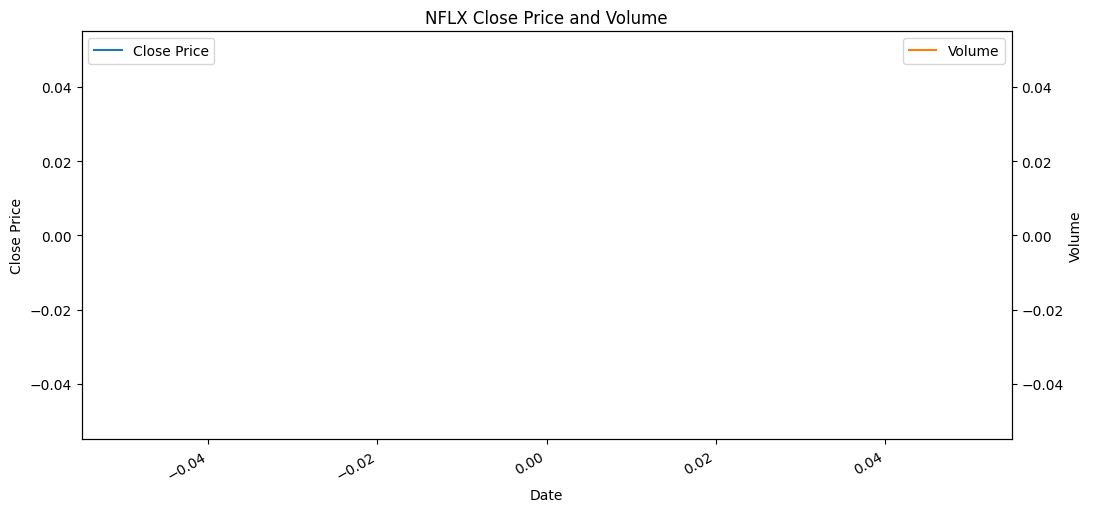

In [33]:
# Plot close and volume
ax = data['Close'].plot(title=f'{ticker} Close Price and Volume', figsize=(12, 6), label='Close Price')
ax.set_ylabel('Close Price')
data['Volume'].plot(secondary_y=True, ax=ax, label='Volume')
ax.right_ax.set_ylabel('Volume')

# Add legends with correct labels
ax.legend(['Close Price'], loc='upper left')
ax.right_ax.legend(['Volume'], loc='upper right')

# Show the plot
plt.show()



Get data for the 3 largest financial companies

A pd.MultiIndex() object has more than one identifier per row. This allows you to get the data based on criteria for multiple companies at once.

In [34]:
# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector=='Finance', 'Market Capitalization'].nlargest(n=3)
top_3_companies


Stock Symbol
JPM    3.002833e+11
WFC    2.569488e+11
BAC    2.236668e+11
Name: Market Capitalization, dtype: float64

In [35]:
# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

top_3_tickers

['JPM', 'WFC', 'BAC']

In [36]:
# Set start date
start = date(2015, 1, 1)

# Set end date
end = date(2020, 4, 1)

# Import stock data
result = yf.download(top_3_tickers, start=start, end=end)
result


[*********************100%***********************]  3 of 3 completed

3 Failed downloads:
['WFC']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029D261EECE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))
['JPM']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029D261EF160>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))
['BAC']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029D262C5BD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


Empty DataFrame
Columns: [(Adj Close, BAC), (Adj Close, JPM), (Adj Close, WFC), (Close, BAC), (Close, JPM), (Close, WFC), (High, BAC), (High, JPM), (High, WFC), (Low, BAC), (Low, JPM), (Low, WFC), (Open, BAC), (Open, JPM), (Open, WFC), (Volume, BAC), (Volume, JPM), (Volume, WFC)]
Index: []

In [37]:
# Apply stack method 
data = result.stack()

data

,Price,Adj Close,Close,High,Low,Open,Volume
Date,Ticker,,,,,,


In [38]:
# Unstack and inspect result
data['Close'].unstack()

Ticker
Date


In [39]:
data['Close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Empty DataFrame


List the poorest and richest countries worldwide

The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

In the next few exercises, you will use these statistics to explore the data in 'per_capita_income.csv', which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

In [40]:
# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            184 non-null    object 
 1   Income per Capita  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [41]:
# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

income

,Country,Income per Capita
133,Qatar,141542.662800
97,"Macao SAR, China",111496.629400
96,Luxembourg,102051.680300
144,Singapore,85382.302270
23,Brunei Darussalam,78369.291020
...,...,...
121,Niger,955.483324
94,Liberia,835.366935
37,"Congo, Dem. Rep.",784.365232
26,Burundi,727.150789


Global incomes: Central tendency

The most common measures of central tendency are the mean, which is equal to the sum of all values divided by the total number of values, median, which separates the upper half of data from the lower half, and mode, which is the most frequent value in the data set. The pandas package contains functions that can calculate each of these.

In this data set, the values for 'Income per Capita' are floats, and there are no repeat values, so running income['Income per Capita'].mode() in your console returns an empty series. Here, you will use the floor division operator // to add a new column that measures income in thousands, rounded down, so that a value such as 11,543.43 becomes just 11.

In [42]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573696
11620.93252


0    1.0
Name: Income per Capita (,000), dtype: float64

In [43]:
income

,Country,Income per Capita,"Income per Capita (,000)"
133,Qatar,141542.662800,141.0
97,"Macao SAR, China",111496.629400,111.0
96,Luxembourg,102051.680300,102.0
144,Singapore,85382.302270,85.0
23,Brunei Darussalam,78369.291020,78.0
...,...,...,...
121,Niger,955.483324,0.0
94,Liberia,835.366935,0.0
37,"Congo, Dem. Rep.",784.365232,0.0
26,Burundi,727.150789,0.0


In [44]:
income['Income per Capita (,000)'].value_counts().head()

Income per Capita (,000)
1.0    18
2.0    12
3.0    12
5.0     9
6.0     7
Name: count, dtype: int64

Global incomes: Dispersion

A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile q of a DataFrame df with the command df.quantile(q); likewise, supplying a list as q will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

In [45]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, mean+std]
print(bounds)

[-2497.4416414691186, 41436.280772943035]


In [46]:
# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([0.25, 0.75])
print(quantiles)

0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64


In [47]:
# Calculate and print IQR
iqr = quantiles[0.75] - quantiles[0.25]
print(iqr)

22636.395729999997


Deciles of the global income distribution

A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

np.arange(start, stop, step)

A standard bar graph is a great way to visualize the distribution of data. You can create one by adding kind='bar' as an argument to .plot().

In [48]:
# Generate range of deciles
quantiles = np.arange(0.1,0.91,0.1)

# Print them
print(quantiles)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [49]:
# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


In [50]:
min(income['Income per Capita']), max(income['Income per Capita'])

(618.7528586, 141542.6628)

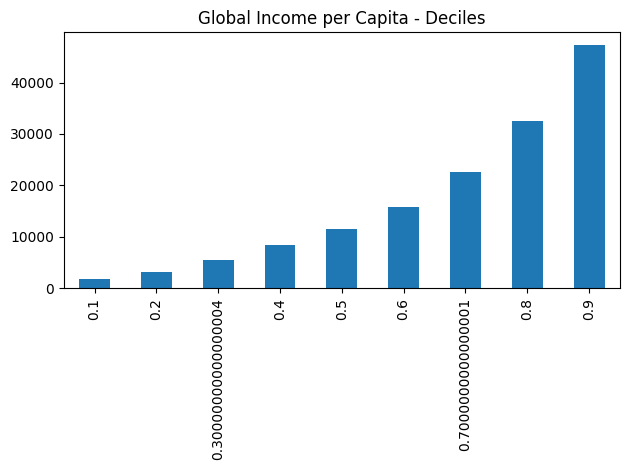

In [51]:
# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

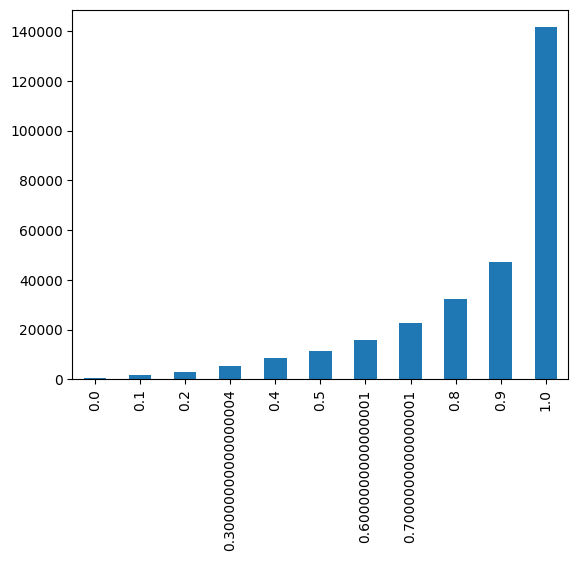

In [52]:
income['Income per Capita'].quantile(np.arange(0,1.1,0.1)).plot(kind='bar')

Getting all the statistics

You can retrieve all major central tendency, dispersion, and shape statistics of a distribution at once with the pandas .describe() method. The default value of its optional percentiles argument corresponds with quartiles, but you can supply your own list of percentiles, as instead:

In [53]:
income.describe(percentiles=[.25, .5, .75])

,Income per Capita,"Income per Capita (,000)"
count,184.000000,184.000000
mean,19469.419566,18.967391
std,21966.861207,21.975869
min,618.752859,0.000000
25%,3922.358940,3.000000
50%,11620.932520,11.000000
75%,26558.754670,26.000000
max,141542.662800,141.000000


In [54]:
income

,Country,Income per Capita,"Income per Capita (,000)"
133,Qatar,141542.662800,141.0
97,"Macao SAR, China",111496.629400,111.0
96,Luxembourg,102051.680300,102.0
144,Singapore,85382.302270,85.0
23,Brunei Darussalam,78369.291020,78.0
...,...,...,...
121,Niger,955.483324,0.0
94,Liberia,835.366935,0.0
37,"Congo, Dem. Rep.",784.365232,0.0
26,Burundi,727.150789,0.0


In [55]:
Country_maxincome = income.Country[income['Income per Capita'].idxmax()]
Country_maxincome

'Qatar'

In [56]:
median_income = income['Income per Capita'].median()
median_income

11620.93252

In [57]:
India_income = income[income.Country=='India']['Income per Capita']
India_income

74    6104.576245
Name: Income per Capita, dtype: float64

In [58]:
median_income - India_income

74    5516.356275
Name: Income per Capita, dtype: float64

In [59]:
income.describe(percentiles=[0.8])

,Income per Capita,"Income per Capita (,000)"
count,184.000000,184.000000
mean,19469.419566,18.967391
std,21966.861207,21.975869
min,618.752859,0.000000
50%,11620.932520,11.000000
80%,32517.693902,31.800000
max,141542.662800,141.000000


Visualizing international income distribution

seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)

In previous exercises, you created a quantile plot which provided a fairly granular sense of the level of income per capita at different points of the distribution. Here, you will use distplot() to get the full picture!

C:\Users\Alienware\AppData\Local\Temp\ipykernel_20236\3107465600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(income['Income per Capita'])


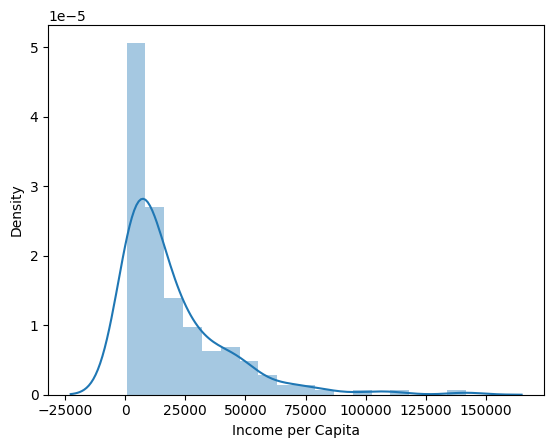

In [60]:
# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()


C:\Users\Alienware\AppData\Local\Temp\ipykernel_20236\2561738641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)


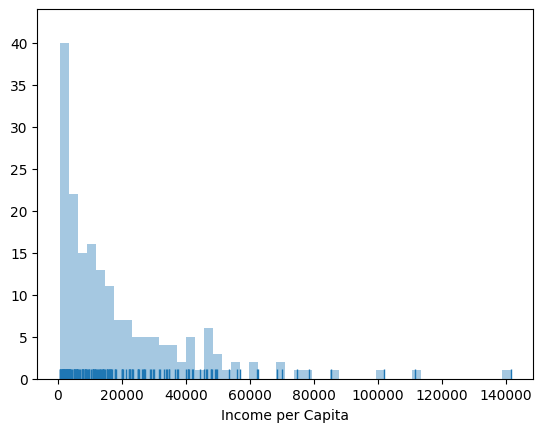

In [61]:
# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

Growth rates in Brazil, China, and the US

It's time to extend your analysis beyond the levels of international per capita income to the growth rates. The 'income_growth.csv' file contains the growth rates of per capita income over the last 40 years for Brazil, China, and the US.

You will plot the distribution of the historical growth rates for each country on the same chart using a KDE plot to faciliate visual comparison of the ranges of growth that these markets have experienced over this time period.

In [62]:
# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

,China,Brazil,USA
count,40.000000,40.000000,40.000000
mean,0.083084,0.013315,0.018239
std,0.032205,0.033211,0.019386
min,-0.030813,-0.066154,-0.036241
25%,0.067948,-0.005524,0.009093
50%,0.085920,0.016912,0.019851
75%,0.099599,0.032199,0.030144
max,0.136383,0.071762,0.063344


In [63]:
growth

,China,Brazil,USA
DATE,,,
1976-01-01,-0.030813,0.071762,0.043894
1977-01-01,0.061140,0.021236,0.035617
1978-01-01,0.101823,0.007905,0.044491
1979-01-01,0.061742,0.042530,0.020433
1980-01-01,0.064630,0.065588,-0.011973
1981-01-01,0.038338,-0.066154,0.015925
1982-01-01,0.073419,-0.017348,-0.028415
1983-01-01,0.092452,-0.055917,0.036801
1984-01-01,0.136383,0.029616,0.063344


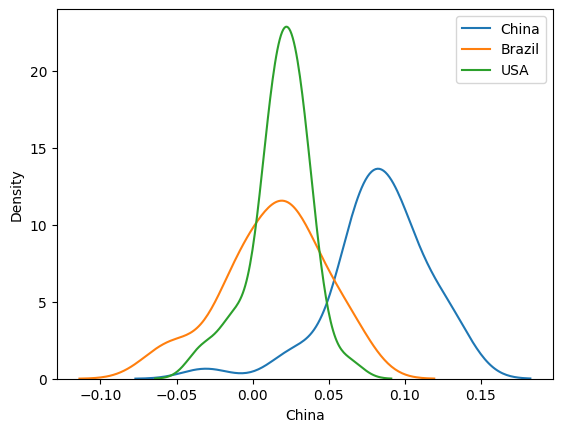

In [64]:
# Iterate over the three columns
for column in growth.columns:
    sns.kdeplot(growth[column], label=column)
    
# Show the plot
plt.legend()
plt.show()

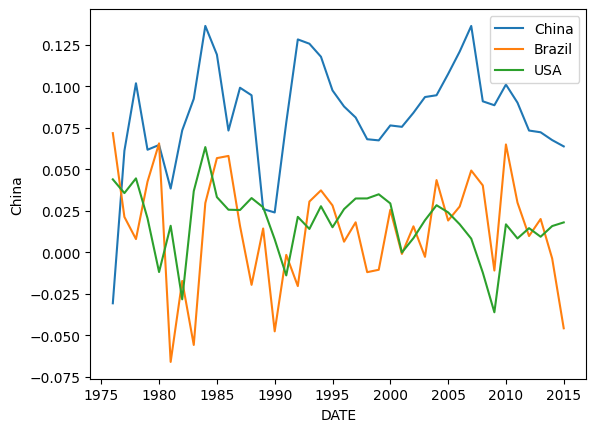

In [65]:
# Iterate over the three columns
for column in growth.columns:
    sns.lineplot(growth[column], label=column)
    
# Show the plot
plt.legend()
plt.show()

Highlighting values in the distribution

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column.

You can also to emphasize a particular value in a plot by adding a vertical line at position x across the axes:

Axes.axvline(x=0, color=None, ...)

In this exercise, you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values.

In [66]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

inc_per_capita

71     56923.490540
175    56115.718430
139    53538.790430
118    49587.005190
8      49429.555550
           ...     
121      955.483324
94       835.366935
37       784.365232
26       727.150789
31       618.752859
Name: Income per Capita, Length: 174, dtype: float64

C:\Users\Alienware\AppData\Local\Temp\ipykernel_20236\1010930938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(inc_per_capita)


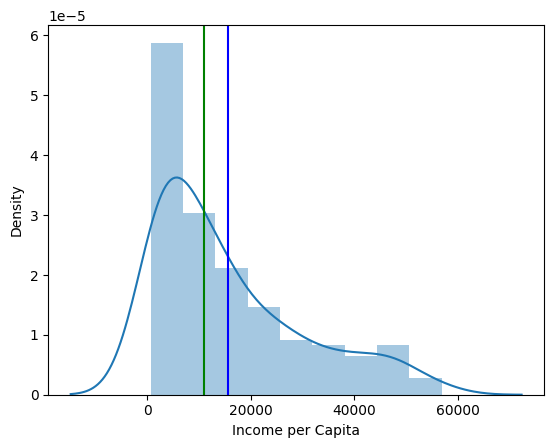

In [67]:
# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

Companies by sector on all exchanges

A categorical variable is a variable that is one of a limited number of values based on some qualitative property. A frequency distribution is a representation of the number of times that a categorical variable occurs.

Think back to the stock exchange data from the earlier chapters. The .mean() function isn't very helpful for understanding the frequency of 'Sector' values such as 'Technology' and 'Finance', whereas .value_counts() and .nunique() are.

In this exercise, you will compare the distribution of listings in the AMEX, NASDAQ, and NYSE per sector. 

In [68]:
listings_dict = {'amex':listings[0], 'nasdaq':listings[1], 'nyse':listings[2]}
listings_dict

{'amex':        Stock Symbol                                       Company Name  \
 0              XXII                            22nd Century Group, Inc   
 1               FAX              Aberdeen Asia-Pacific Income Fund Inc   
 2               IAF                 Aberdeen Australia Equity Fund Inc   
 3                CH                          Aberdeen Chile Fund, Inc.   
 4    ABE             Aberdeen Emerging Markets Smaller Company Oppo...   
 ..              ...                                                ...   
 355             WYY                              WidePoint Corporation   
 356             WTT                      Wireless Telecom Group,  Inc.   
 357            XTNT                       Xtant Medical Holdings, Inc.   
 358            YUMA                                  Yuma Energy, Inc.   
 359            ZDGE                                        Zedge, Inc.   
 
      Last Sale  Market Capitalization  IPO Year                 Sector  \
 0       1.3300

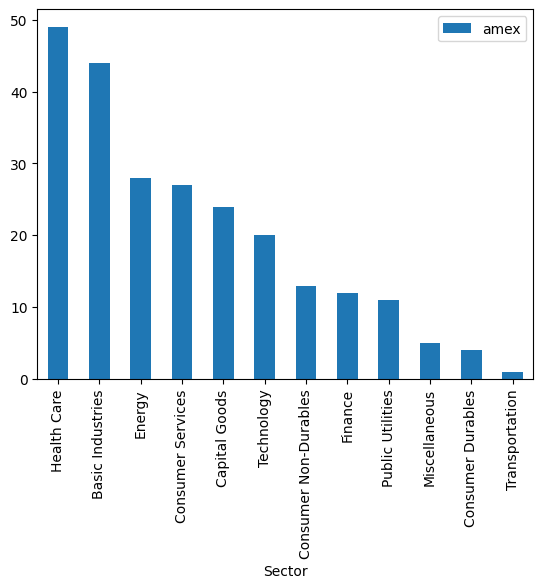

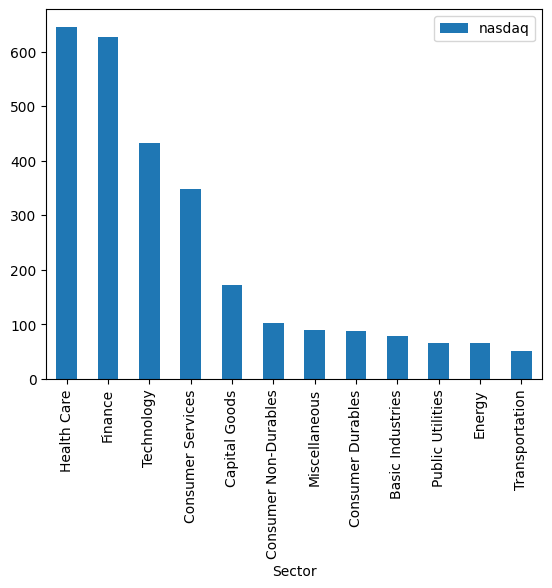

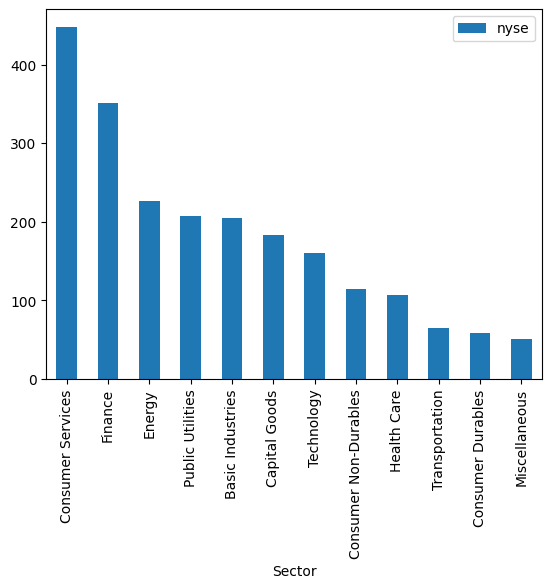

In [69]:
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings_dict[exchange].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar', label=exchange)
    # Show the plot
    plt.legend()
    plt.show()

Technology IPOs by year on all exchanges

Each company in the listings dictionary has an IPO year between 1972 and 2017. Therefore, in this context, it is appropriate to consider the 'IPO Year' column of each sheet as a categorical variable with a well-defined order even though it is of dtype float64.

Here you will combine data from all three exchanges and plot the distribution of IPO years for companies in the Technology sector. 

In [70]:
# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']
tech_companies

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
14,ACY,AeroCentury Corp.,10.000,1.566699e+07,NaN,Technology,Diversified Commercial Services,amex
45,BGSF,BG Staffing Inc,14.900,1.302257e+08,NaN,Technology,Professional Services,amex
56,BDR,"Blonder Tongue Laboratories, Inc.",0.525,4.263963e+06,NaN,Technology,Radio And Television Broadcasting And Communic...,amex
77,CVR,Chicago Rivet & Machine Co.,39.700,3.835544e+07,NaN,Technology,Industrial Machinery/Components,amex
133,EMAN,eMagin Corporation,2.400,7.590364e+07,NaN,Technology,Semiconductors,amex
...,...,...,...,...,...,...,...,...
3116,XTLY,Xactly Corporation,11.450,3.608941e+08,2015.0,Technology,Computer Software: Prepackaged Software,nyse
3129,YGE,Yingli Green Energy Holding Company Limited,2.810,5.107562e+07,2007.0,Technology,Semiconductors,nyse
3134,YUME,"YuMe, Inc.",3.850,1.310482e+08,2013.0,Technology,Advertising,nyse
3136,ZEN,"Zendesk, Inc.",28.180,2.772825e+09,2014.0,Technology,EDP Services,nyse


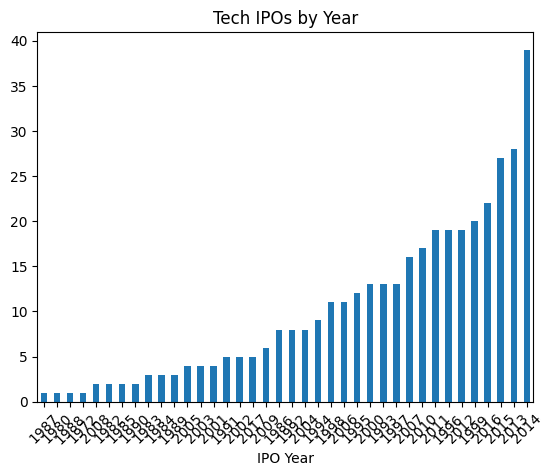

In [71]:
# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()